<a href="https://colab.research.google.com/github/piyushpatro/Cancer-prediction/blob/main/Skill_geek_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, accuracy_score, confusion_matrix
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
y=df['diagnosis']
X=df.drop(labels=['Unnamed: 32', 'id', 'diagnosis'], axis=1)

In [ ]:
#1.1 Standardizing the training data(X)

scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


Components: 
 [[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.753394

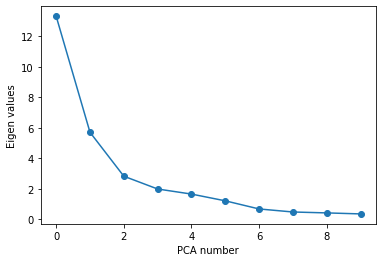

In [ ]:
#1.2 finding the principle components of X

pca=PCA(n_components=10)
components=pca.fit_transform(X)
print('Components: \n', pca.components_)

# calculating the corresponding loads
loadings=pca.components_.T * np.sqrt(pca.explained_variance_)         # loadings=eigenvectors*(eigenvalues)^0.5
print('loadings: \n', loadings)

# Plotting eigen values as a function of its number
fig, ax=plt.subplots(1, 1)
ax.plot(pca.explained_variance_, marker='o')
ax.set_xlabel('PCA number')
ax.set_ylabel('Eigen values')
plt.show()

In [ ]:
#1.3 Kaiser rule: the eigen value should be greater than 1
n=0
for i in pca.explained_variance_:
  if(i>1):
    n=n+1
  else:
    break
print('The number of major components that should be retained as per Kaiser rule is:',n)

# Conditional number rule: max(eigen values)/(eigen value)<10
x=0
max=np.max(pca.explained_variance_)
for i in pca.explained_variance_:
  if(max/i<10):
    x=x+1
  else:
    break
print('The number of major components that should be retained as per Conditional number rule is:',x)

The number of major components that should be retained as per Kaiser rule is: 6
The number of major components that should be retained as per Conditional number rule is: 5


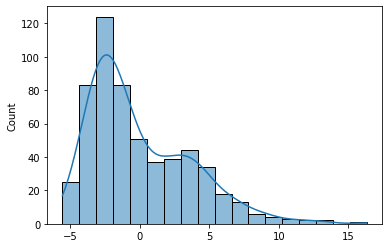

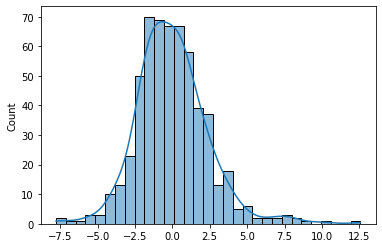

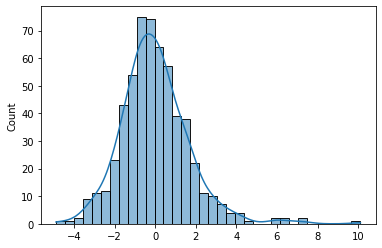

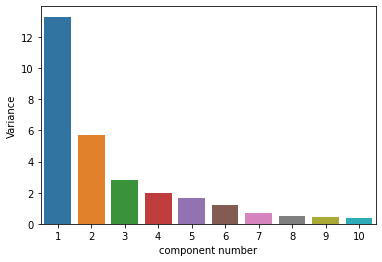

In [ ]:
#2.1 Data visualisation using histograms
sns.histplot(components[:, 0], kde=True)
plt.show()
sns.histplot(components[:, 1], kde=True)
plt.show()
sns.histplot(components[:, 2], kde=True)
plt.show()

#2.1 Data visualisation using histograms
sns.barplot(x=np.arange(1, len(pca.explained_variance_)+1, 1) ,y=pca.explained_variance_)
plt.xlabel('component number')
plt.ylabel('Variance')
plt.show()

# As the variance of PCA_1 is highest, therefore it is best component for seperation of classes

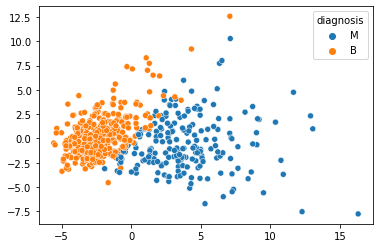

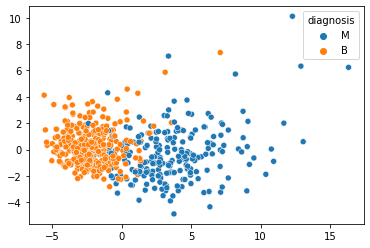

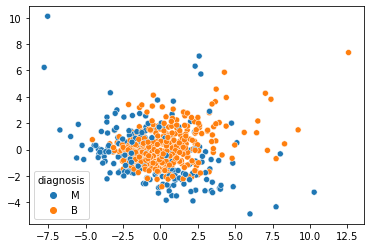

In [ ]:
#2.2 Data visualisation using PCA
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=y)
plt.show()

sns.scatterplot(x=components[:, 0], y=components[:, 2], hue=y)
plt.show()

sns.scatterplot(x=components[:, 1], y=components[:, 2], hue=y)
plt.show()

In [ ]:
#3.1 K means clustering of data
k_means_2=KMeans(n_clusters=2, n_init=100)
k_means_2.fit(components[:, 0:2])
pred_2=k_means_2.predict(components[:,0:2])
score_2=davies_bouldin_score(components[:, 0:2], k_means_2.predict(components[:,0:2]))
cluster_centers_2=k_means_2.cluster_centers_

k_means_3=KMeans(n_clusters=3, n_init=100)
k_means_3.fit(components[:, 0:2])
pred_3=k_means_3.predict(components[:,0:2])
score_3=davies_bouldin_score(components[:, 0:2], k_means_3.predict(components[:,0:2]))
cluster_centers_3=k_means_3.cluster_centers_


k_means_5=KMeans(n_clusters=5, n_init=100)
k_means_5.fit(components[:, 0:2])
pred_5=k_means_5.predict(components[:,0:2])
score_5=davies_bouldin_score(components[:, 0:2], k_means_5.predict(components[:,0:2]))
cluster_centers_5=k_means_5.cluster_centers_

print('Scores are for 2, 3, 5: \n', score_2, score_3, score_5)
print('Cluster centroids are for 2, 3, 5: \n', cluster_centers_2, cluster_centers_3, cluster_centers_5)

report=pd.DataFrame([[cluster_centers_2[0], score_2, 2],
              [cluster_centers_2[1], score_2, 2],
              [cluster_centers_3[0], score_3, 3],
              [cluster_centers_3[1], score_3, 3],
              [cluster_centers_3[2], score_3, 3],
              [cluster_centers_5[0], score_5, 5],
              [cluster_centers_5[1], score_5, 5],
              [cluster_centers_5[2], score_5, 5],
              [cluster_centers_5[3], score_5, 5],
              [cluster_centers_5[4], score_5, 5]], columns=['Centroids (x,y)', 'Score', 'Clusters'])
#Report
display(report)

Scores are for 2, 3, 5: 
 0.846740380995431 0.9105499630161624 0.957643528488884
Cluster centroids are for 2, 3, 5: 
 [[ 4.35883027  0.04297744]
 [-2.20247773 -0.02171612]] [[-2.36453918 -0.25542325]
 [ 5.05903111 -1.74041615]
 [ 2.18623605  3.19710261]] [[-2.87805583 -0.98406106]
 [ 3.4267872   4.42736216]
 [ 3.1621223  -1.68371417]
 [-1.25389106  1.42006688]
 [ 8.48509005 -1.27137633]]


,"Centroids (x,y)",Score,Clusters
0,"[4.358830266128906, 0.04297744366713985]",0.846740,2
1,"[-2.2024777270651357, -0.02171611571540682]",0.846740,2
2,"[-2.364539176268079, -0.25542325103119606]",0.910550,3
3,"[5.059031109929047, -1.7404161544896635]",0.910550,3
4,"[2.186236045777078, 3.1971026117281927]",0.910550,3
5,"[-2.878055829608825, -0.9840610551105498]",0.957644,5
6,"[3.426787195685556, 4.427362162741769]",0.957644,5
7,"[3.1621223027643084, -1.6837141732654408]",0.957644,5
8,"[-1.2538910612116407, 1.4200668791276678]",0.957644,5
9,"[8.485090048540897, -1.2713763288495183]",0.957644,5


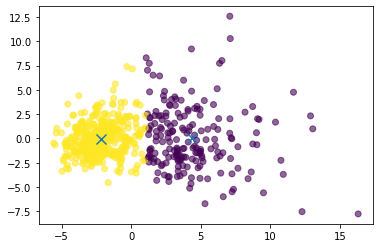

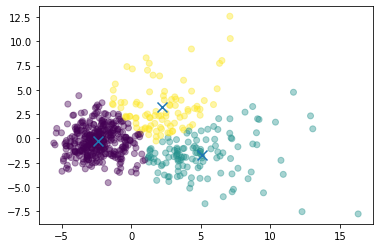

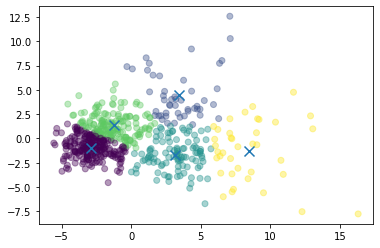

In [ ]:
#3.2 Visualisation

fig, ax=plt.subplots(1,1)
ax.scatter(components[:, 0], components[:,1], c=pred_2, alpha=0.6)
ax.scatter(cluster_centers_2[:, 0], cluster_centers_2[:, 1], marker='x', s=100)
plt.show()

fig, ax=plt.subplots(1,1)
ax.scatter(components[:, 0], components[:,1], c=pred_3, alpha=0.4)
ax.scatter(cluster_centers_3[:, 0], cluster_centers_3[:, 1], marker='x', s=100)
plt.show()

fig, ax=plt.subplots(1,1)
ax.scatter(components[:, 0], components[:,1], c=pred_5, alpha=0.4)
ax.scatter(cluster_centers_5[:, 0], cluster_centers_5[:, 1], marker='x', s=100)
plt.show()

In [ ]:
#4.1 calculation of purity of cluster
y=np.array(pd.get_dummies(y, drop_first=True))
y=y.reshape(569)
cm_2=confusion_matrix(pred_2, y)
cm_3=confusion_matrix(pred_3, y)
cm_5=confusion_matrix(pred_5, y)

purity_2=(np.max(cm_2[0,:])+np.max(cm_2[1,:]))/np.sum(cm_2)
purity_3=(np.max(cm_3[0,:])+np.max(cm_3[1,:]+np.max(cm_3[2,:])))/np.sum(cm_3)
purity_5=(np.max(cm_5[0,:])+np.max(cm_5[1,:]+np.max(cm_5[2,:]))+np.max(cm_5[3,:])+np.max(cm_5[4,:]))/np.sum(cm_5)

print('purity score for 2, 3, 5 is:', purity_2, purity_3, purity_5)

purity score for 2, 3, 5 is: 0.9068541300527241 0.8734622144112478 0.9173989455184535


In [ ]:
#4.2 Relative Information gain

def InformationGain(class0, class1):
	return -(class0 * np.log2(class0) + class1 * np.log2(class1))

_, counts_pred=np.unique(pred_2, return_counts=True)
_, counts_y=np.unique(y, return_counts=True)

class_1_pred=counts_pred[0]/np.sum(counts_pred)
class_2_pred=counts_pred[1]/np.sum(counts_pred)
pred_gain=InformationGain(class_1_pred, class_2_pred)

class_1_y=counts_y[0]/np.sum(counts_y)
class_2_y=counts_y[1]/np.sum(counts_y)
y_gain=InformationGain(class_1_y, class_2_y)

relative_gain=np.round(y_gain/pred_gain - 1, 3)
print('Relative gain is:',relative_gain)

Relative gain is: 0.035


In [ ]:
# For 2 clusters
centroid_0=components[58]
centroid_1=components[0]

In [ ]:
D=np.sqrt(np.sum((centroid_0-components)**2, axis=1)), np.sqrt(np.sum((centroid_1-components)**2, axis=1))
D=np.array(D).T
C0=[]
C1=[]
for i in range(D.shape[0]):
  if(D[i, 0]>=D[i, 1]):
    C0.append(components[i])
  else:
    C1.append(components[i])
C0=np.array(C0)
C1=np.array(C1)
centroid_0=(np.max(C0, axis=0)+np.min(C0, axis=0)/2)
centroid_1=(np.max(C1, axis=0)+np.min(C1, axis=0)/2)

In [ ]:
D

array([[14.34301349,  0.        ],
       [ 6.92875965, 10.00713828],
       [ 9.77390037,  6.37819537],
       ...,
       [ 6.15997465, 11.60045833],
       [15.10858273,  6.67171562],
       [ 3.7471729 , 16.38219817]])

In [ ]:
centroid_2

array([ 1.71530973, -1.52370502,  0.14618709,  1.91138642,  0.53612327,
        0.03625984,  0.18402996, -0.21890376, -0.38167   , -0.0365216 ])

In [ ]:
a=np.array(y)
np.unique(a, return_counts=True)

(array([0, 1], dtype=uint8), array([357, 212]))

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=5, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self._is_converged(centroids_old, self.centroids):
              break
        predictions=self._get_cluster_labels(self.clusters)
        return predictions

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

In [ ]:
kmeans=KMeans(K=2, max_iters=100)

In [ ]:
davies_bouldin_score(X, kmeans.predict(X))

1.3092887340398864